In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from string import ascii_letters
SEED = 1
%matplotlib inline
sns.set()

In [5]:
X = np.linspace(0, 100, 101)
Y = np.poly1d([-1, 0, 2])


In [15]:
df = sns.load_dataset('iris')
d = df

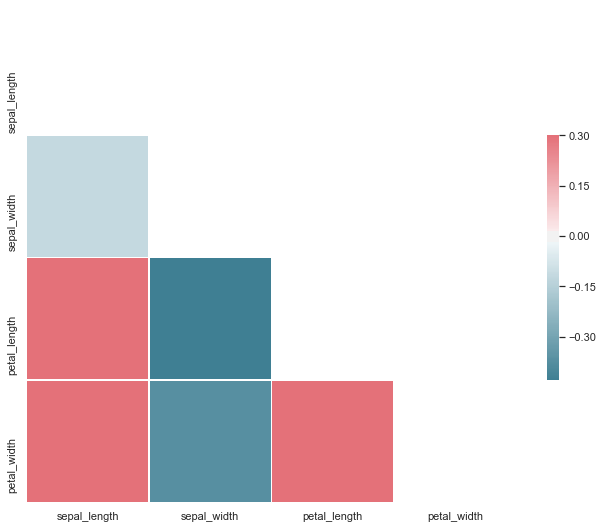

In [16]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
# d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                  columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

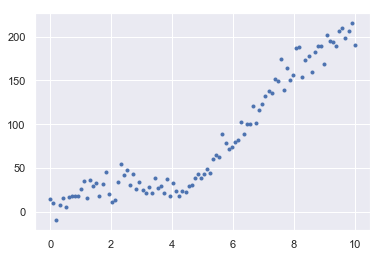

In [28]:
NUM_SAMPLES = 100; START = 0; STOP = 10
# noise = np.random.RandomState(seed=SEED)

def f(a=1, b=2, c=2, sin_m=20):
    poly = np.poly1d([c, b, a])
    def final(x):
        return poly(x) + sin_m * np.sin(x)
    return final

def evaluate_deg(x_train, y_train, x_test, y_test, deg=1):
    params = np.polyfit(x_train, y_train, deg=deg)
    poly = np.poly1d(params)
    y_train_pred = poly(x_train)
    y_test_pred = poly(x_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    return [deg, mse_train, mse_test, poly]

def plot_tradeoff(X, Y_noise, f_true, results, sigma):
    fig, ax = plt.subplots(figsize=(16, 8),nrows=1, ncols=2)
    ax[0].plot(X, Y_noise, '.', label='data')
    ax[0].plot(X, f_true(X), '-', label=r'$f(x) = 2x^2 + 2x + 1 + 20sin(x)$')
    
    degrees = [result[0] for result in results]
    mse_train_line = [result[1] for result in results]
    mse_test_line = [result[2] for result in results]
    ax[1].plot(degrees, mse_train_line, c='red', label='Train')
    ax[1].plot(degrees, mse_test_line, c='gray', label='Test')
    
    ax[1].axhline(sigma**2, linestyle='--', label=r'$\sigma^2$')
    for result in results:
        ax[0].plot(X, result[3](X), label="Deg {}".format(result[0]))
    ax[0].legend()
    ax[1].legend()

    ax[0].set_xlabel("X")
    ax[0].set_ylabel("Y")
    ax[1].set_xlabel("Degree")
    ax[1].set_ylabel("MSE")
    ax[1].set_ylim(0, 2000)

    

def set_up(mu=0, sigma=20):
    # Data
    noise = np.random.RandomState(seed=sigma)
    f_true = f()
    X = np.linspace(START, STOP, NUM_SAMPLES)
    Y = f_true(X)

    Y_noise = Y + noise.normal(mu, sigma, NUM_SAMPLES)

    x_train, x_test, y_train, y_test = train_test_split(X, Y_noise, test_size=0.50, random_state=SEED)
    degrees= [1,2, 5, 10]
    results = [evaluate_deg(x_train, y_train, x_test, y_test, deg=deg) for deg in degrees]
    
    return X, Y_noise, f_true, results

def plot_interact(mu=0, sigma=20):
    X, Y_noise, f_true, results = set_up(mu, sigma)
    plot_tradeoff(X, Y_noise, f_true, results, sigma)
    
    
X, Y_noise, f_true, results = set_up(0, 10)

a = plt.plot(X, Y_noise, '.')
plt.savefig('assets/regression_plot.png')